# Presentation 1: Analysing trends in hate crimes in the USA.

# Research Question 1:
How does the frequency of hate crimes between race or ethnic groups in the US differ over time.

**Null Hypothesis (H₀):**
There is no significant difference in the frequency of hate crimes among different racial or ethnic groups over time.

**Alternative Hypothesis (H₁):**
There is a significant difference in the frequency of hate crimes among different racial or ethnic groups over time.

# Research Question 2:

How the relationship between intimidation and aggravated assault changes over time?

**Null Hypothesis (H₀):**
There is no correlation between intimidation and aggrevated assault over time

**Alternative Hypothesis (H₁):**
Increases in intimidation hate crimes also leads to an increase over time

# Research Question 3:

Has the overall number of reported hate crimes fluctuated significantly, indicating temporal or seasonal trends?

**Null Hypothesis (H₀):**
The number of hate crimes has remained stable over time, showing no significant temporal or seasonal variation.

**Alternative Hypothesis (H₁):**
The number of hate crimes has varied significantly over time, showing clear temporal or seasonal fluctuations.


#Data Collection
The first step of our project is to collect the data we are going to use for analysis from the API, clean the data, and filter out uneccessary features.

In [ ]:
import os, math, time, requests, pandas as pd, numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import json as js
import scipy.stats as stats
import pprint as pprint

headers = {
    'accept': 'application/json',
}

df_location_type = pd.DataFrame()
df_offender_race = pd.DataFrame()
df_offense_type = pd.DataFrame()
df_victim_type = pd.DataFrame()
df_bias = pd.DataFrame()
df_bias_category = pd.DataFrame()
df_monthly_totals = pd.DataFrame()

years = list(range(1995, 2025))
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

for year in years:
    for i, month in enumerate(months):
        if i == 11:
            month_next = '01'
            year_next = year + 1
        else:
            month_next = months[i + 1]
            year_next = year

        params = {
            'from': f'{month}-{year}',
            'to': f'{month_next}-{year_next}',
            'API_KEY': 'iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv',
        }

        response1 = requests.get(
            'https://api.usa.gov/crime/fbi/cde/hate-crime/national?type=totals',
            params=params,
            headers=headers
        )

        response2 = requests.get(
            'https://api.usa.gov/crime/fbi/cde/hate-crime/national?type=counts',
            params=params,
            headers=headers
        )

        time_label = f"{month}-{year}"
        crime_data = response1.json()
        monthly_totals = response2.json()

        bias_section = crime_data.get('bias_section', {})
        incident_section = crime_data.get('incident_section', {})
        actual_values = monthly_totals.get('actuals', {})

        if 'location_type' in bias_section:
            df_location_type = pd.concat(
                [df_location_type, pd.DataFrame([bias_section['location_type']], index=[time_label])]
            )

        if 'offender_race' in bias_section:
            df_offender_race = pd.concat(
                [df_offender_race, pd.DataFrame([bias_section['offender_race']], index=[time_label])]
            )

        if 'offense_type' in bias_section:
            df_offense_type = pd.concat(
                [df_offense_type, pd.DataFrame([bias_section['offense_type']], index=[time_label])]
            )

        if 'victim_type' in bias_section:
            df_victim_type = pd.concat(
                [df_victim_type, pd.DataFrame([bias_section['victim_type']], index=[time_label])]
            )

        if 'bias' in incident_section:
            df_bias = pd.concat(
                [df_bias, pd.DataFrame([incident_section['bias']], index=[time_label])]
            )

        if 'bias_category' in incident_section:
            df_bias_category = pd.concat(
                [df_bias_category, pd.DataFrame([incident_section['bias_category']], index=[time_label])]
            )


        if 'United States Offenses' in actual_values:
            df_monthly_totals = pd.concat([
                df_monthly_totals,
                pd.DataFrame({'Count': [actual_values["United States Offenses"][f'{month}-{year}']]}, index=[time_label])
            ])


print("Finished!")

Finished!


# Below we extract the 7 columns with the highest counts

In [ ]:
top7_cols_location = df_location_type.sum().sort_values(ascending=False).head(7).index
df_location_type = df_location_type[top7_cols_location]

top7_cols_offender_race = df_offender_race.sum().sort_values(ascending=False).head(7).index
df_offender_race = df_offender_race[top7_cols_offender_race]

top7_offense_type = df_offense_type.sum().sort_values(ascending=False).head(7).index
df_offense_type = df_offense_type[top7_offense_type]

top7_victim_type = df_victim_type.sum().sort_values(ascending=False).head(7).index
df_victim_type = df_victim_type[top7_victim_type]

top7_bias = df_bias.sum().sort_values(ascending=False).head(7).index
df_bias = df_bias[top7_bias]

top7_bias_category = df_bias_category.sum().sort_values(ascending=False).head(7).index
df_bias_category = df_bias_category[top7_bias_category]

#Exploratory Data Analysis

In [ ]:
hateCrimeDatabase = pd.concat([
    df_location_type,
    df_offender_race,
    df_offense_type,
    df_victim_type,
    df_bias,
    df_bias_category
], axis=1)
hateCrimeDatabase.head(20)
hateCrimeDatabase['Monthly Count'] = df_monthly_totals


hateCrimeDatabase = hateCrimeDatabase.reset_index().rename(columns={'index': 'Date'})
hateCrimeDatabase['Date'] = pd.to_datetime(hateCrimeDatabase['Date'])
hateCrimeDatabase['Year'] = hateCrimeDatabase['Date'].dt.year
hateCrimeDatabase['Month'] = hateCrimeDatabase['Date'].dt.month
hateCrimeDatabase.head(20)

/tmp/ipython-input-2892324246.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hateCrimeDatabase['Date'] = pd.to_datetime(hateCrimeDatabase['Date'])


,Date,Residence/Home,Highway/Road/Alley/Street/Sidewalk,Other/Unknown,School/College,Parking/Drop Lot/Garage,Church/Synagogue/Temple/Mosque,School-Elementary/Secondary,White,Black or African American,...,"Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",Race/Ethnicity/Ancestry,Religion,Sexual Orientation,Gender Identity,Disability,Gender,Monthly Count,Year,Month
0,1995-01-01,303,230,146,161,61,47,0,792,318,...,18,793,189,176,0,0,0,690,1995,1
1,1995-02-01,352,258,164,178,93,37,0,853,358,...,15,940,195,150,0,0,0,730,1995,2
2,1995-03-01,415,289,175,150,100,44,0,853,419,...,21,965,256,161,0,0,0,880,1995,3
3,1995-04-01,372,301,175,95,62,43,0,744,393,...,22,837,219,180,0,0,0,831,1995,4
4,1995-05-01,380,309,207,94,62,35,0,765,393,...,20,912,181,187,0,0,0,805,1995,5
5,1995-06-01,448,332,252,82,65,44,0,854,406,...,12,1013,214,207,0,0,0,900,1995,6
6,1995-07-01,429,355,242,64,68,48,0,948,400,...,10,1021,202,186,0,0,0,873,1995,7
7,1995-08-01,420,361,222,108,73,47,0,997,408,...,14,1079,195,172,0,0,0,858,1995,8
8,1995-09-01,446,364,257,195,73,44,0,1005,450,...,22,1202,233,179,0,0,0,907,1995,9
9,1995-10-01,369,316,248,185,60,47,0,869,438,...,27,1045,234,166,0,0,0,1041,1995,10


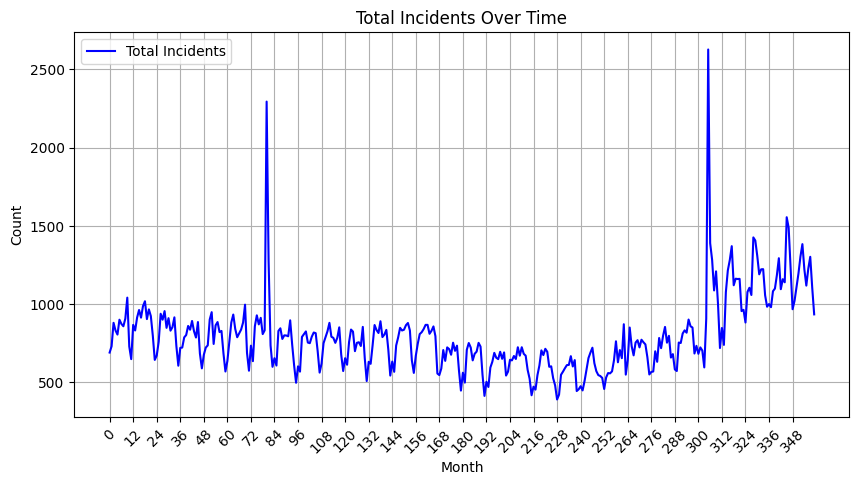

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hateCrimeDatabase.index, hateCrimeDatabase['Monthly Count'], color='blue', label='Total Incidents')
plt.title('Total Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(
    ticks=range(0, len(hateCrimeDatabase.index), 12),
    labels=hateCrimeDatabase.index[::12],
    rotation=45
)
plt.show()


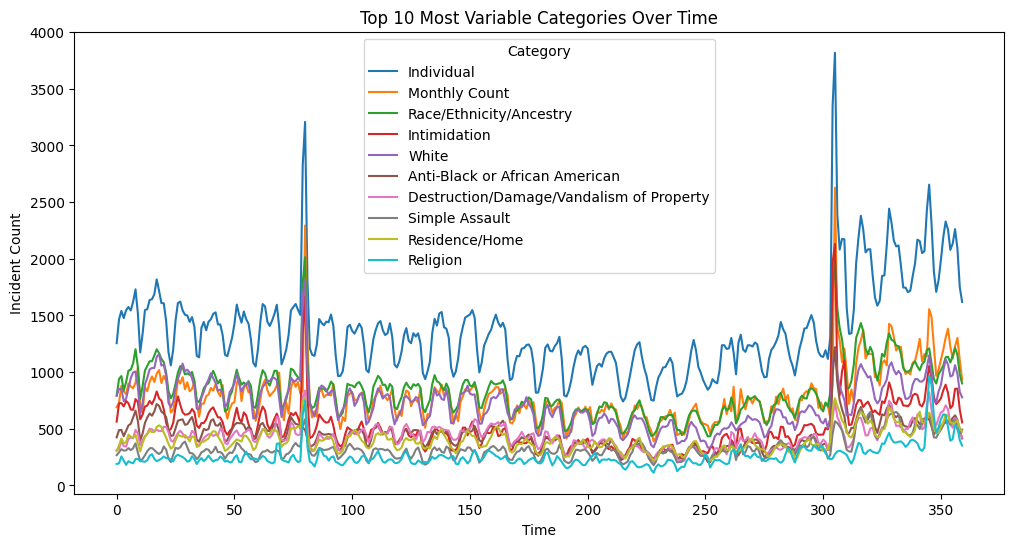

In [ ]:
top_vars = hateCrimeDatabase.var(numeric_only=True).sort_values(ascending=False).head(10).index
hateCrimeDatabase[top_vars].plot(figsize=(12,6))
plt.title("Top 10 Most Variable Categories Over Time")
plt.xlabel("Time")
plt.ylabel("Incident Count")
plt.legend(title="Category")
plt.show()


#Research Question 1
How does the frequency of hate crimes between race or ethnic groups in the US differ over time.

  # ANOVA Test

In [ ]:
race_columns = [
    'White',
    'Black or African American',
    'Asian',
    'American Indian or Alaska Native',
    'Multiple',
    'Native Hawaiian or Other Pacific Islander'
]
df_long = hateCrimeDatabase[race_columns].melt(
    var_name='Race/Ethnicity',
    value_name='Incident Count')
groups = [df_long.loc[df_long['Race/Ethnicity'] == race, 'Incident Count'] for race in race_columns]
f_stat, p_value = stats.f_oneway(*groups)
print("ANOVA test results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.6f}")
alpha = 0.05
if p_value < alpha:
    print("Reject H₀ → Significant difference in hate crime frequency across racial/ethnic groups.")
else:
    print("Fail to reject H₀ → No significant difference between groups.")

ANOVA test results:
F-statistic: 3665.100
P-value: 0.000000
Reject H₀ → Significant difference in hate crime frequency across racial/ethnic groups.


#Kruskal Wallis Test
This test is similar to ANOVA but it doesnt assume a normal distribution, which is safer for our data set seeing as its a count based dataframe.

In [ ]:
from scipy import stats

groups = [df_long.loc[df_long['Race/Ethnicity'] == race, 'Incident Count'] for race in race_columns]

h_stat, p_value = stats.kruskal(*groups)
print("Kruskal–Wallis H-test results:")
print(f"H-statistic: {h_stat:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Reject H₀ → Significant difference among groups.")
else:
    print("Fail to reject H₀ → No significant difference.")


Kruskal–Wallis H-test results:
H-statistic: 2005.482
P-value: 0.00000
Reject H₀ → Significant difference among groups.


#Visualization

/tmp/ipython-input-145684834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Race/Ethnicity', y='Incident Count', data=df_long, palette='Set2')


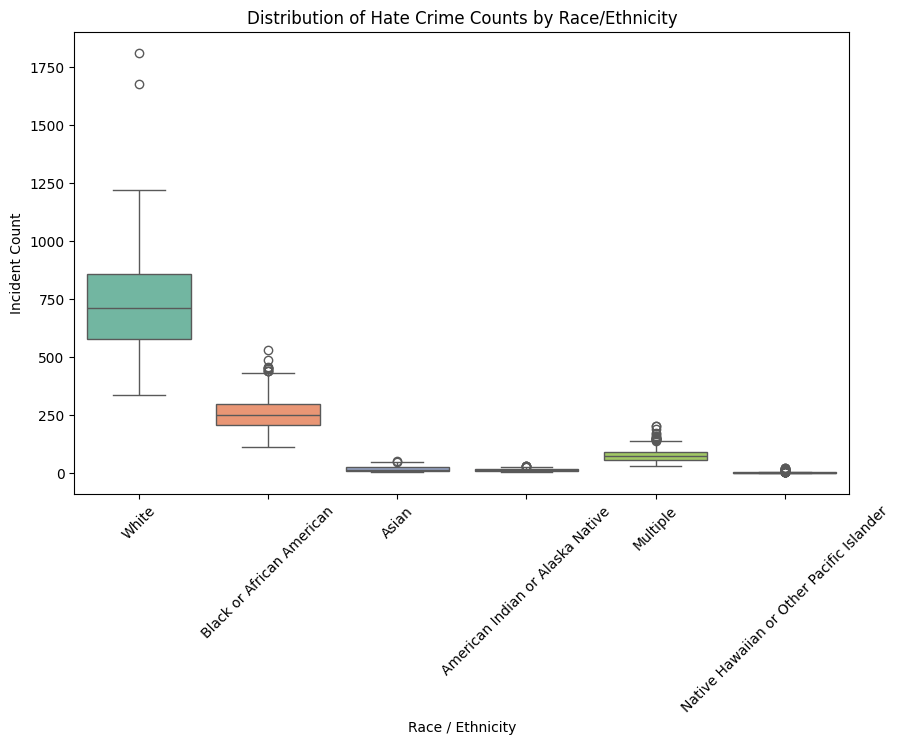

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Race/Ethnicity', y='Incident Count', data=df_long, palette='Set2')
plt.title('Distribution of Hate Crime Counts by Race/Ethnicity')
plt.xlabel('Race / Ethnicity')
plt.ylabel('Incident Count')
plt.xticks(rotation=45)
plt.show()

# Research Question 2:

How the relationship between intimidation and aggravated assault changes over time.

In [ ]:
df_offense_type

,Intimidation,Destruction/Damage/Vandalism of Property,Simple Assault,Aggravated Assault,Robbery,Burglary/Breaking & Entering,All Other Larceny
01-1995,563,312,267,215,20,13,3
02-1995,724,320,292,210,19,14,3
03-1995,726,394,320,203,28,12,1
04-1995,697,346,307,223,26,14,0
05-1995,745,342,309,229,34,16,2
...,...,...,...,...,...,...,...
08-2024,706,508,571,355,37,34,84
09-2024,852,593,579,329,36,28,76
10-2024,854,574,493,270,35,30,78
11-2024,669,466,458,236,29,27,60


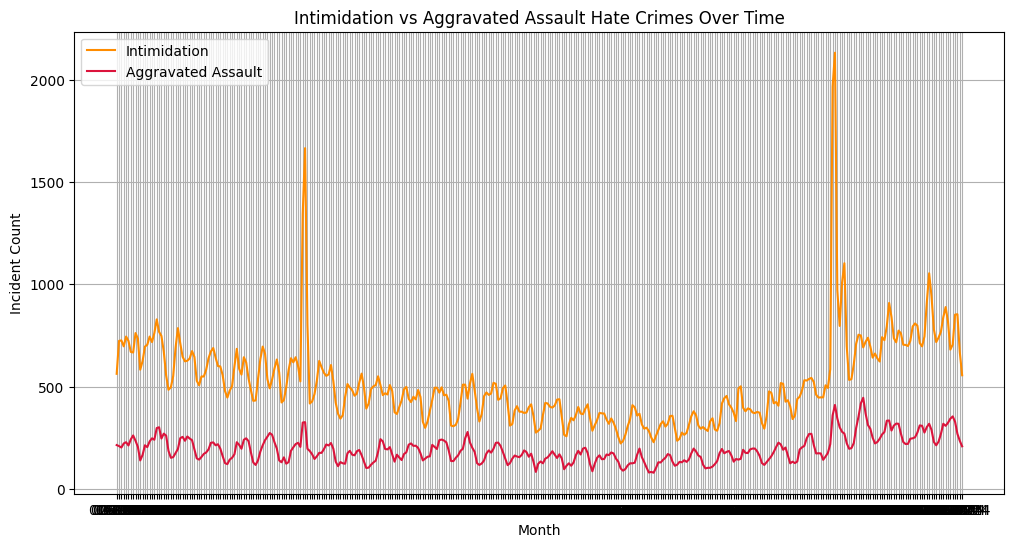

In [ ]:
df_relation = df_offense_type[['Intimidation', 'Aggravated Assault']].copy()

plt.figure(figsize=(12,6))
plt.plot(df_relation.index, df_relation['Intimidation'], label='Intimidation', color='darkorange')
plt.plot(df_relation.index, df_relation['Aggravated Assault'], label='Aggravated Assault', color='crimson')
plt.title('Intimidation vs Aggravated Assault Hate Crimes Over Time')
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.legend()
plt.grid(True)
plt.show()


Pearson correlation: 0.7643874747546184
r = 0.764, p-value = 0.0000


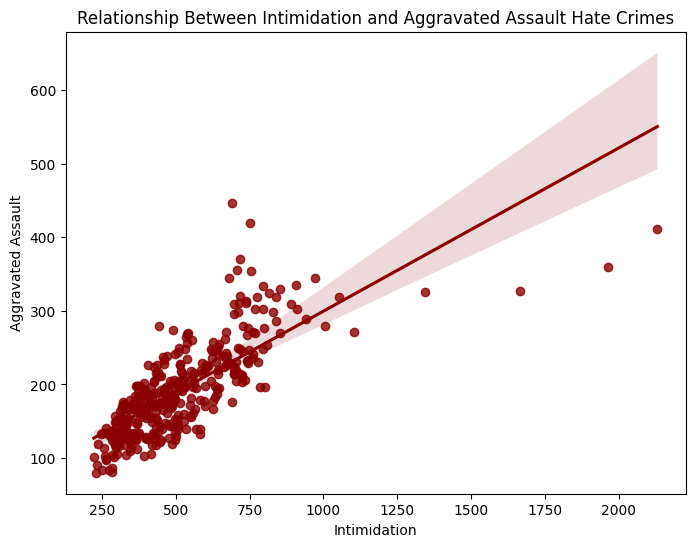

In [ ]:
corr = df_relation['Intimidation'].corr(df_relation['Aggravated Assault'])
print("Pearson correlation:", corr)

from scipy.stats import pearsonr
r, p = pearsonr(df_relation['Intimidation'], df_relation['Aggravated Assault'])
print(f"r = {r:.3f}, p-value = {p:.4f}")


import seaborn as sns
plt.figure(figsize=(8,6))
sns.regplot(x='Intimidation', y='Aggravated Assault', data=df_relation, color='darkred')
plt.title('Relationship Between Intimidation and Aggravated Assault Hate Crimes')
plt.show()


#Research Question 3
Has the overall number of reported hate crimes fluctuated significantly, indicating temporal or seasonal trends?

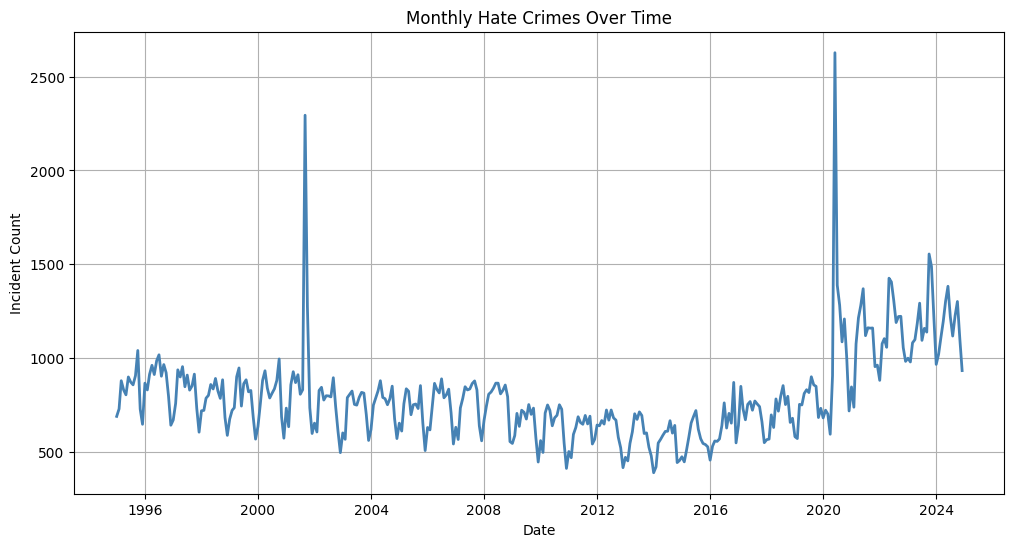

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(hateCrimeDatabase['Date'], hateCrimeDatabase['Monthly Count'], color='steelblue', lw=2)
plt.title('Monthly Hate Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.grid(True)
plt.show()


In [ ]:
import statsmodels.api as sm
import numpy as np


hateCrimeDatabase = hateCrimeDatabase.sort_index()
hateCrimeDatabase['Time_Index'] = np.arange(len(hateCrimeDatabase))


X = sm.add_constant(hateCrimeDatabase['Time_Index'])
y = hateCrimeDatabase['Monthly Count']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Monthly Count   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     17.42
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           3.76e-05
Time:                        12:33:35   Log-Likelihood:                -2476.9
No. Observations:                 360   AIC:                             4958.
Df Residuals:                     358   BIC:                             4966.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        704.9609     24.832     28.389      0.0

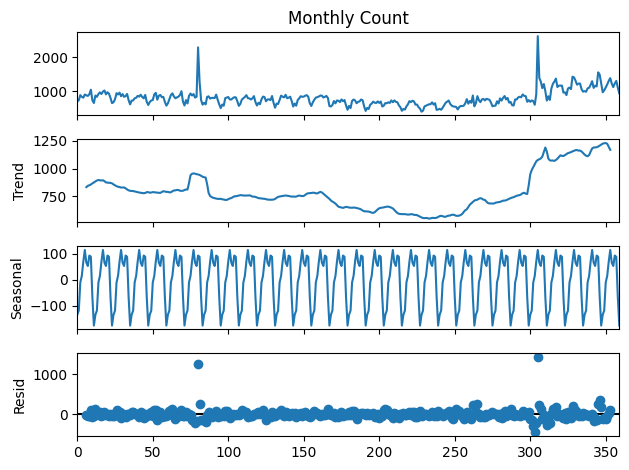

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(hateCrimeDatabase['Monthly Count'], model='additive', period=12)
decomposition.plot()
plt.show()


In [ ]:
hateCrimeDatabase = hateCrimeDatabase.rename(columns={'Monthly Count': 'Monthly_Count'})
anova = sm.stats.anova_lm(
    sm.OLS.from_formula('Monthly_Count ~ C(Year)', data=hateCrimeDatabase).fit(),
    typ=2)
print(anova)

                sum_sq     df          F        PR(>F)
C(Year)   1.134516e+07   29.0  13.480125  1.856521e-40
Residual  9.577073e+06  330.0        NaN           NaN


In [ ]:
anova_month = sm.stats.anova_lm(
    sm.OLS.from_formula('Monthly_Count ~ C(Month)', data=hateCrimeDatabase).fit(),
    typ=2
)
print(anova_month)


                sum_sq     df         F        PR(>F)
C(Month)  3.312900e+06   11.0  5.951848  6.721001e-09
Residual  1.760934e+07  348.0       NaN           NaN


In [ ]:
cols_offense = [
    'Intimidation',
    'Destruction/Damage/Vandalism of Property',
    'Simple Assault',
    'Aggravated Assault',
    'Robbery',
    'Burglary/Breaking & Entering',
    'All Other Larceny',
    'Monthly_Count'
]

from statsmodels.tsa.api import VAR

# Example: Offense pattern VAR
df = hateCrimeDatabase[cols_offense].dropna()

# Stationarity check & differencing
df_diff = df.diff().dropna()

# Fit
model = VAR(df_diff)
results = model.fit(ic='aic')
print(results.summary())



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 26, Oct, 2025
Time:                     12:33:57
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    51.7063
Nobs:                     347.000    HQIC:                   46.5255
Log likelihood:          -10640.5    FPE:                5.89303e+18
AIC:                      43.0980    Det(Omega_mle):     8.20182e+17
--------------------------------------------------------------------
Results for equation Intimidation
                                                  coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------
const                                                1.767250         5.245867            0.337           0.736
L1.Intimidation                          